In [76]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torchvision
from torchvision import transforms
import torchvision.datasets as dset
import torch
from PIL import Image
import PIL

import matplotlib.patches as patches
import matplotlib.pyplot as plt
from torch.utils.data import Subset, DataLoader,Dataset
import torch.nn as nn
import kornia
import random
import torch.nn.functional as F
from facenet_pytorch import MTCNN
import cv2
import os
from scipy.spatial.distance import cosine
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [77]:
mtcnn = MTCNN(margin=40, keep_all=True, device=device,post_process=False)

def extract_face(facefile):


    img = cv2.imread(facefile)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    frame = Image.fromarray(img)

    
    boxes, probs = mtcnn.detect(frame)

    #Eliminating detection with a prob less than 80 percent

    probsFilter = probs > 0.80

    boxes = boxes[probsFilter]

    x1, y1, width, height = list(map(lambda x: round(x),boxes[0]))


    face = img[y1:height,x1:width]
    image = Image.fromarray(face)
    image = image.resize((224,224))
    face_array = np.asarray(image)

    return face_array

<class 'numpy.ndarray'>


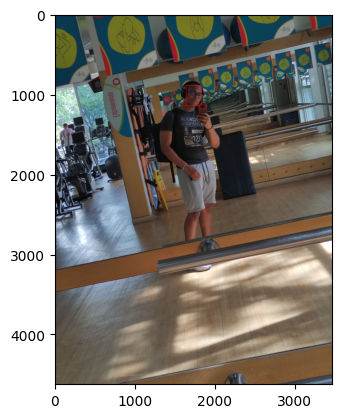

In [78]:



    





img_path = 'daniel.jpg'

img = cv2.imread(img_path)
print(type(img))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

frame = Image.fromarray(img)



boxes, probs, landmarks = mtcnn.detect(frame, landmarks=True)

#Eliminating detection with a prob less than 80 percent

probsFilter = probs > 0.80

boxes = boxes[probsFilter]
landmarks=landmarks[probsFilter]








fig = plt.figure()
ax = fig.add_subplot(111)

draw = PIL.ImageDraw.Draw(frame)


for box, landmark in zip(boxes, landmarks):
    #ax.scatter(*np.meshgrid(box[[0, 2]], box[[1, 3]]))

    draw.rectangle(box.tolist(), outline=(255, 0, 0), width=6)
   #ax.scatter(landmark[:, 0], landmark[:, 1], s=8)

ax.imshow(frame)



1/1 [==============================] - 1s 525ms/step
2 2
>face is a Match (0.263 <= 0.400)


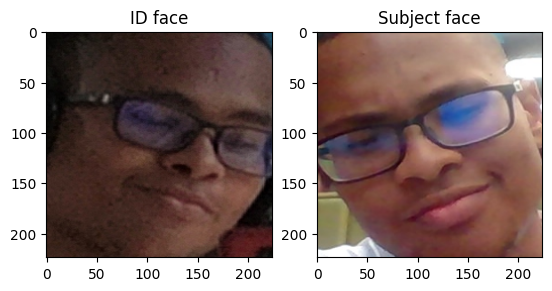

In [83]:
model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')

def get_embedding(filename,model=model):
    # extract faces
    face = extract_face(filename)
    # convert into an array of samples
    sample = [np.asarray(face, 'float32')]
    # prepare the face for the model, e.g. center pixels
    sample = preprocess_input(sample, version=2)
    # perform prediction
    yhat = model.predict(sample)
    return yhat

idfile = "daniel.jpg"
subfile= "train_dir/daniel/PIXECT-20220829164621.jpg"

def is_match(ID_embedding, subject_embedding,show_faces,thresh=0.4):
    # calculate distance between embeddings
    score = cosine(ID_embedding, subject_embedding)

    if show_faces==True:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        ax1.imshow(extract_face(idfile))
        ax1.set_title('ID face')
        ax2.imshow(extract_face(subfile))
        ax2.set_title('Subject face')

    if score <= thresh:
        print('>face is a Match (%.3f <= %.3f)' % (score, thresh))
    else:
        print('>face is NOT a Match (%.3f > %.3f)' % (score, thresh))

idembedding = get_embedding(idfile)
subembedding = get_embedding(subfile)
print(subembedding.ndim,idembedding.ndim)
is_match(idembedding.flatten(),subembedding.flatten(),True)

1/1 [==============================] - 2s 2s/step


/tmp/ipykernel_2591/1152411531.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


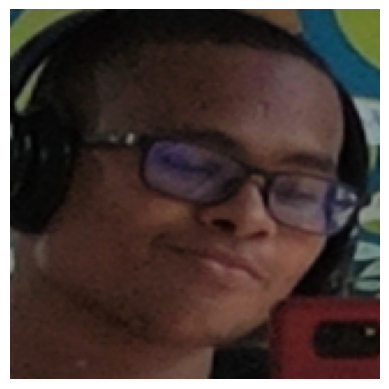

In [ ]:
faces = mtcnn(Image.fromarray(img))



fig, axes = plt.subplots(1, len(faces))

iter = [axes] if len(faces) == 1 else axes

for face, ax in zip(faces, iter):
    ax.imshow(face.permute(1, 2, 0).int().numpy())
    ax.axis('off')
fig.show()